In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

In [2]:
cwd = os.getcwd()
lista = []
for files in os.listdir(cwd + '\\SalesAnalysis\\Sales_Data'):
    lista.append(pd.read_csv(cwd + '\\SalesAnalysis\\Sales_Data\\' + files))

df = pd.concat(lista)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [4]:
df = df.rename(columns={'Price Each': 'Price_Each'})

df = df[df['Price_Each'] != 'Price Each']

df = df.dropna()

df['Price_Each'] = df['Price_Each'].astype(float)

df['month'] = df['Order Date'].str[0:2]

dfmonth = df.groupby('month', as_index=False)['Price_Each'].sum()

dfmonth.sort_values(by='Price_Each', ascending=False)


,month,Price_Each
11,12,4588415.41
9,10,3715554.83
3,04,3367671.02
10,11,3180600.68
4,05,3135125.13
2,03,2791207.83
6,07,2632539.56
5,06,2562025.61
7,08,2230345.42
1,02,2188884.72


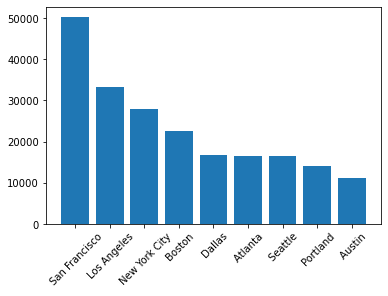

In [5]:
pattern = r'((?<=,).*(?=,))'

df['city'] = df['Purchase Address'].str.extract(pattern)

df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)

dfquantity = df.groupby('city',as_index=False)['Quantity Ordered'].sum()

dfquantity = dfquantity.sort_values(by='Quantity Ordered', ascending=False)

citys = dfquantity['city']

value = dfquantity['Quantity Ordered']

plt.bar(citys, value, width=0.8)
plt.xticks(rotation = 45)
plt.show()

In [6]:
df.head()

,Order ID,Product,Quantity Ordered,Price_Each,Order Date,Purchase Address,month,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,Los Angeles


C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_1404\485881535.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timedf['Order Date'] = timedf['Order Date'].apply(lambda x : x.split(' ')[1][:2])


<function matplotlib.pyplot.show(close=None, block=None)>

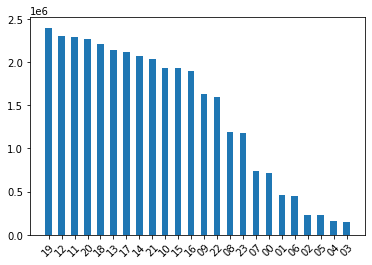

In [7]:
df.head()

timedf = df[['Order Date', 'Price_Each']]

timedf['Order Date'] = timedf['Order Date'].apply(lambda x : x.split(' ')[1][:2])

timedf = timedf.groupby('Order Date', as_index=False)['Price_Each'].sum()

timedf = timedf.sort_values(by='Price_Each', ascending=False)

plt.bar(timedf['Order Date'], timedf['Price_Each'], width=0.5)
plt.xticks(rotation=45)
plt.show

In [8]:
solddf = df[['Order ID' ,'Product', 'Quantity Ordered', 'Purchase Address']]

uaudf = solddf.groupby('Order ID', as_index=False)['Product'].sum()

uaudf = uaudf.groupby('Product', as_index=False)['Order ID'].value_counts()

uaudf = uaudf.groupby('Product', as_index=False)['count'].sum()

uaudf = uaudf.sort_values(by='count', ascending=False)

uaudf[(~uaudf['Product'].isin(solddf['Product']))]

,Product,count
361,iPhoneLightning Charging Cable,882
183,Google PhoneUSB-C Charging Cable,856
382,iPhoneWired Headphones,361
316,Vareebadd PhoneUSB-C Charging Cable,312
201,Google PhoneWired Headphones,303
...,...,...
208,LG Dryer27in FHD Monitor,1
207,LG Dryer27in 4K Gaming Monitor,1
204,Google PhoneWired HeadphonesUSB-C Charging Cable,1
203,Google PhoneWired HeadphonesMacbook Pro Laptop,1


In [18]:
mostdf = df.groupby('Product', as_index=False)['Quantity Ordered'].sum()

mostdf.sort_values(by='Quantity Ordered', ascending=False)

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244


# Respostas

> What was the best month for sales? How much was earned that month?

December(12), $4588415.41

> What city sold the most product?

San Francisco

> What time should we display advertisements to maximize the likelihood of customer’s buying product?

7 PM

> What products are most often sold together?

iPhone Lightning and Charging Cable

> What product sold the most? Why do you think it sold the most?

AAA Batteries (4-pack). It's cheap and very usable at a lot of other products